In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
pd.set_option('display.max_columns', None)
import os 
import sys

sys.path.append(os.path.abspath('..'))

In [2]:
from src.preprocess_data import CleanData

In [3]:
df = pd.read_csv('C:/Users/Temp/Desktop/KAI-Projects/Insurance-Risk-Car-Insurance-Risk-Modeling/data/MachineLearningRating.csv')

C:\Users\Temp\AppData\Local\Temp\ipykernel_19036\1034177340.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/Temp/Desktop/KAI-Projects/Insurance-Risk-Car-Insurance-Risk-Modeling/data/MachineLearningRating.csv')


In [4]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
df.tail()


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,PostalCode,MainCrestaZone,SubCrestaZone,ItemType,mmcode,VehicleType,RegistrationYear,make,Model,Cylinders,cubiccapacity,kilowatts,bodytype,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,WrittenOff,Rebuilt,Converted,CrossBorder,NumberOfVehiclesInFleet,SumInsured,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
1000093,31520,389,2015-04-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,Single,Male,South Africa,Western Cape,7493,Karoo 1 (Northeast of Cape Town),Northeast of CT,Mobility - Motor,4614100.0,Passenger Vehicle,2013,B.A.W,SASUKA 2.7i (16 SEAT),4.0,2693.0,110.0,B/S,4.0,2013/01/01 12:00:00 AM,NaN,Yes,No,0,More than 6 months,No,No,No,NaN,NaN,500000.0,Monthly,395.8481,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520,389,2015-06-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,Single,Male,South Africa,Western Cape,7493,Karoo 1 (Northeast of Cape Town),Northeast of CT,Mobility - Motor,4614100.0,Passenger Vehicle,2013,B.A.W,SASUKA 2.7i (16 SEAT),4.0,2693.0,110.0,B/S,4.0,2013/01/01 12:00:00 AM,NaN,Yes,No,0,More than 6 months,No,No,No,NaN,NaN,500000.0,Monthly,395.8481,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520,389,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,Single,Male,South Africa,Western Cape,7493,Karoo 1 (Northeast of Cape Town),Northeast of CT,Mobility - Motor,4614100.0,Passenger Vehicle,2013,B.A.W,SASUKA 2.7i (16 SEAT),4.0,2693.0,110.0,B/S,4.0,2013/01/01 12:00:00 AM,NaN,Yes,No,0,More than 6 months,No,No,No,NaN,NaN,500000.0,Monthly,395.8481,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519,389,2014-07-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,Single,Male,South Africa,Western Cape,7493,Karoo 1 (Northeast of Cape Town),Northeast of CT,Mobility - Motor,4614100.0,Passenger Vehicle,2013,B.A.W,SASUKA 2.7i (16 SEAT),4.0,2693.0,110.0,B/S,4.0,2013/01/01 12:00:00 AM,NaN,Yes,No,0,More than 6 months,No,No,No,NaN,NaN,5000000.0,Monthly,2.6391,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0
1000097,31519,389,2015-02-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,Single,Male,South Africa,Western Cape,7493,Karoo 1 (Northeast of Cape Town),Northeast of CT,Mobility - Motor,4614100.0,Passenger Vehicle,2013,B.A.W,SASUKA 2.7i (16 SEAT),4.0,2693.0,110.0,B/S,4.0,2013/01/01 12:00:00 AM,NaN,Yes,No,0,More than 6 months,No,No,No,NaN,NaN,5000000.0,Monthly,2.6391,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


In [6]:
df.isna().sum()

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

In [7]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [8]:
df['AccountType'].unique()

array(['Current account', 'Savings account', nan, 'Transmission account'],
      dtype=object)

                Cleaning Data with droping columns with above 60% null value
                

In [9]:
clean = CleanData(df)
columns =['CustomValueEstimate', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet']
df = clean.drop_multi_column(columns)


<Axes: title={'center': 'Bank frquency '}, xlabel='Count', ylabel='Banks'>

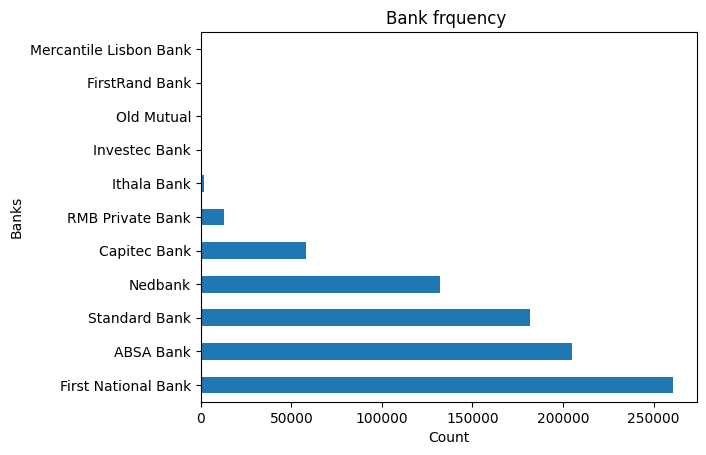

In [10]:
clean.plot_bar('Bank')

            
            Now we fill the Na value using the previous one in the dataframe of BANK column because most of the data  have same value consequntly 

In [11]:
print(type(df))
df['Bank'] = df['Bank'].fillna(method='ffill')

<class 'NoneType'>


TypeError: 'NoneType' object is not subscriptable